In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
sales = pd.read_csv('sales_uplift.csv')

In [42]:
sales.head()
sales.drop(columns='Unnamed: 0', inplace=True)

In [43]:
sales.head()

,date,customer_id,product_id,quantity,unit_price,revenue,marketing_campaign
0,2021-01-01,372,58,4,42.01,168.04,False
1,2021-01-02,288,61,1,74.71,74.71,False
2,2021-01-03,130,24,3,36.74,110.22,False
3,2021-01-04,175,20,3,60.98,182.94,False
4,2021-01-05,462,37,2,52.84,105.68,False


In [44]:
missing_value = sales.isnull().sum()
print(missing_value)

date                  0
customer_id           0
product_id            0
quantity              0
unit_price            0
revenue               0
marketing_campaign    0
dtype: int64


In [45]:
duplicates = sales.duplicated().sum()
print(duplicates)

0


In [46]:
product = sales.groupby('product_id')['revenue'].mean()
print(product)

product_id
1      334.840000
2      295.410000
3      650.740000
4      158.595000
5      224.195000
          ...    
96     280.386667
97      92.560000
98     293.122000
99     473.365000
100     66.350000
Name: revenue, Length: 94, dtype: float64


In [47]:
tot_revenue = sales['revenue'].sum()
print(tot_revenue)

70089.53


In [48]:
tot_quantity = sales['quantity'].sum()
print(tot_quantity)

1215


In [49]:
quanity_per_product = sales.groupby('product_id')['quantity'].sum().reset_index()
quanity_per_product.rename(columns= {'quantity':'total_quantity'}, inplace= True)
print(quanity_per_product)

    product_id  total_quantity
0            1              28
1            2              14
2            3              17
3            4               8
4            5              19
..         ...             ...
89          96              22
90          97               1
91          98              22
92          99              19
93         100               3

[94 rows x 2 columns]


In [50]:
sales.groupby('marketing_campaign')['revenue'].sum()

marketing_campaign
False    32692.24
True     37397.29
Name: revenue, dtype: float64

In [51]:
campaign_true = sales[sales['marketing_campaign'] == True]
campaign_false = sales[sales['marketing_campaign'] == False]

print("Data where marketing campaign is True:")
print(campaign_true.head())

print("\nData where marketing campaign is False:")
print(campaign_false.head())

Data where marketing campaign is True:
           date  customer_id  product_id  quantity  unit_price  revenue  \
200  2021-07-20          459          82        12       83.62  1003.44   
201  2021-07-21          466          13        15       84.89  1273.35   
202  2021-07-22           12          23        13       55.67   723.71   
203  2021-07-23           87          83        13       10.57   137.41   
204  2021-07-24           12          75        13       35.83   465.79   

     marketing_campaign  
200                True  
201                True  
202                True  
203                True  
204                True  

Data where marketing campaign is False:
         date  customer_id  product_id  quantity  unit_price  revenue  \
0  2021-01-01          372          58         4       42.01   168.04   
1  2021-01-02          288          61         1       74.71    74.71   
2  2021-01-03          130          24         3       36.74   110.22   
3  2021-01-04        

In [52]:
campaign_revenue = sales[sales['marketing_campaign'] == True]['revenue'].sum().round(2)
print(f"Revenue during marketing campaign: {campaign_revenue}")
no_campaign_revenue = sales[sales['marketing_campaign'] == False]['revenue'].sum().round(2)
print(f"Revenue during no marketing campaign: {no_campaign_revenue}")
revenue_change = campaign_revenue - no_campaign_revenue
print(f"Change in revenue during marketing campaign: {revenue_change.round(2)}")

Revenue during marketing campaign: 37397.29
Revenue during no marketing campaign: 32692.24
Change in revenue during marketing campaign: 4705.05


In [53]:
campagin_days = sales[sales['marketing_campaign'] == True].count()
no_campagin_days = sales[sales['marketing_campaign'] == False].count()

print(campagin_days)
print(no_campagin_days)

date                  50
customer_id           50
product_id            50
quantity              50
unit_price            50
revenue               50
marketing_campaign    50
dtype: int64
date                  200
customer_id           200
product_id            200
quantity              200
unit_price            200
revenue               200
marketing_campaign    200
dtype: int64


In [54]:
campaign_revenue_avg = sales[sales['marketing_campaign'] == True]['revenue'].mean().round(2)
no_campaign_revenue_avg = sales[sales['marketing_campaign'] == False]['revenue'].mean().round(2)
print(f'The average revenue for campaign days is: {campaign_revenue_avg}')
print(f'The average revenue for no campaign days is: {no_campaign_revenue_avg}')

The average revenue for campaign days is: 747.95
The average revenue for no campaign days is: 163.46


In [55]:
# The difference between both values
multi = (campaign_revenue_avg / no_campaign_revenue_avg).round(2)
print(f'The multiplier between values: {multi}')

The multiplier between values: 4.58


In [56]:
# Also lets see the change in quanity between these
campaign_quantity_avg = sales[sales['marketing_campaign'] == True]['quantity'].mean().round(2)
no_campaign_quantity_avg = sales[sales['marketing_campaign'] == False]['quantity'].mean().round(2)
print(f'The average quantity when campagin is true: {campaign_quantity_avg}')
print(f'The average quantity when campagin is false: {no_campaign_quantity_avg}')


The average quantity when campagin is true: 12.82
The average quantity when campagin is false: 2.87


In [57]:
pre_period = [
    sales[sales['marketing_campaign'] == False]['date'].min(),
    sales[sales['marketing_campaign'] == False]['date'].max()
]
post_period = [
    sales[sales['marketing_campaign'] == True]['date'].min(),
    sales[sales['marketing_campaign'] == True]['date'].max()
]


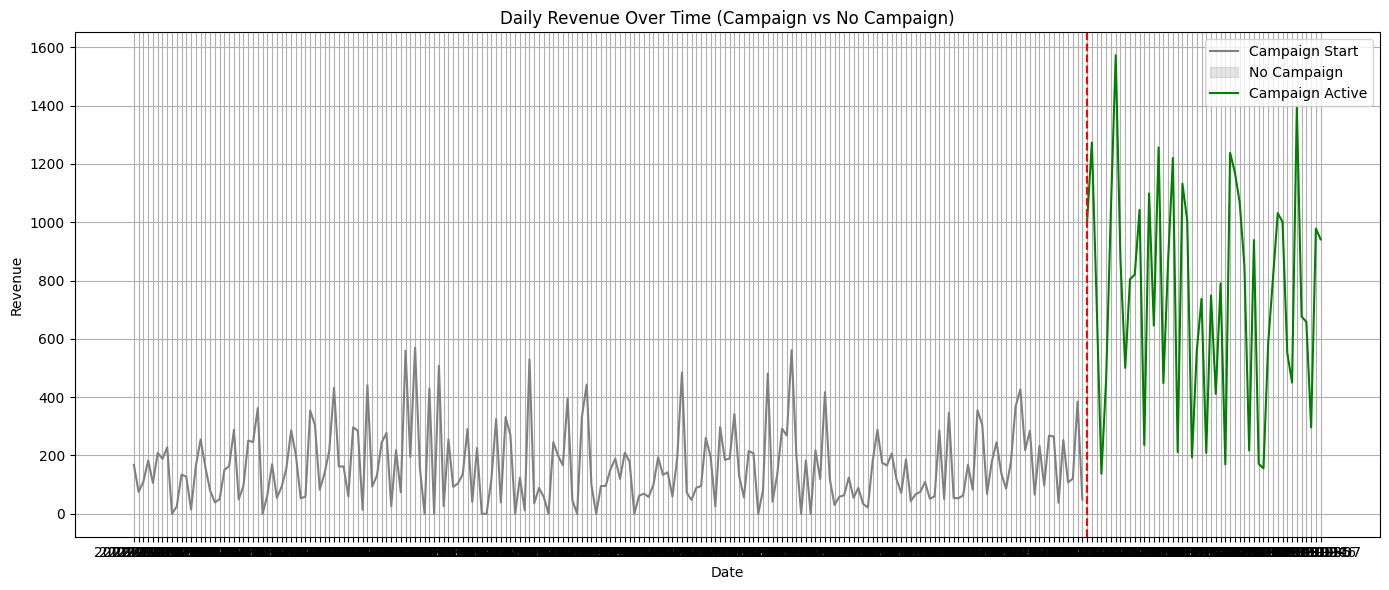

In [58]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=sales, x='date', y='revenue', hue='marketing_campaign', palette={False: "gray", True: "green"})
plt.axvline(sales[sales['marketing_campaign']].date.min(), color='red', linestyle='--', label='Campaign Start')
plt.title('Daily Revenue Over Time (Campaign vs No Campaign)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend(['Campaign Start', 'No Campaign', 'Campaign Active'])
plt.grid(True)
plt.tight_layout()
plt.show()

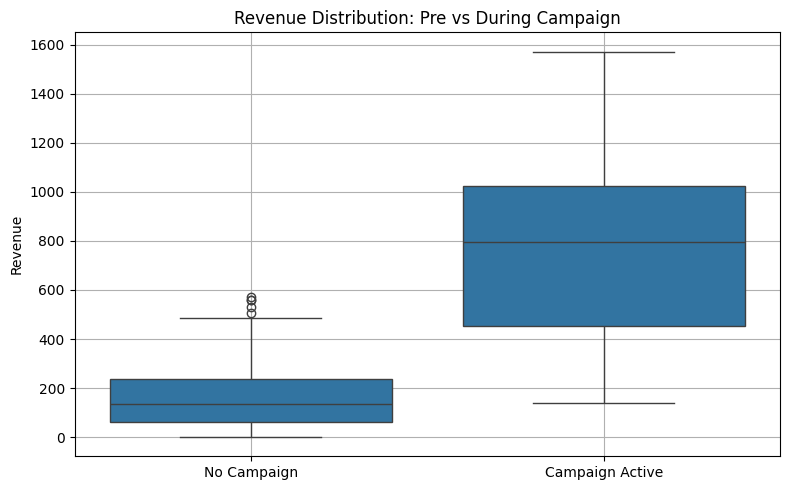

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sales, x='marketing_campaign', y='revenue')
plt.xticks([0, 1], ['No Campaign', 'Campaign Active'])
plt.title('Revenue Distribution: Pre vs During Campaign')
plt.xlabel('')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

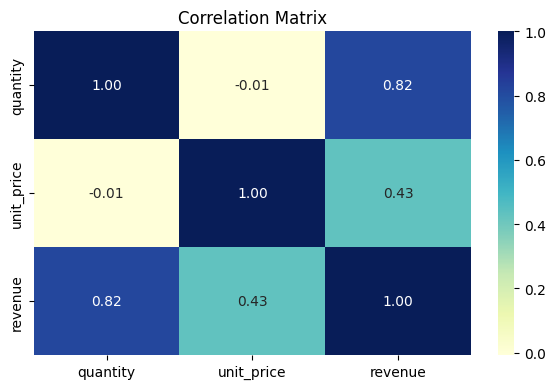

In [60]:
corr = sales[['quantity', 'unit_price', 'revenue']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

/var/folders/wk/btl5__ws27j89zzfj9xyfnf80000gp/T/ipykernel_2818/3033677458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')


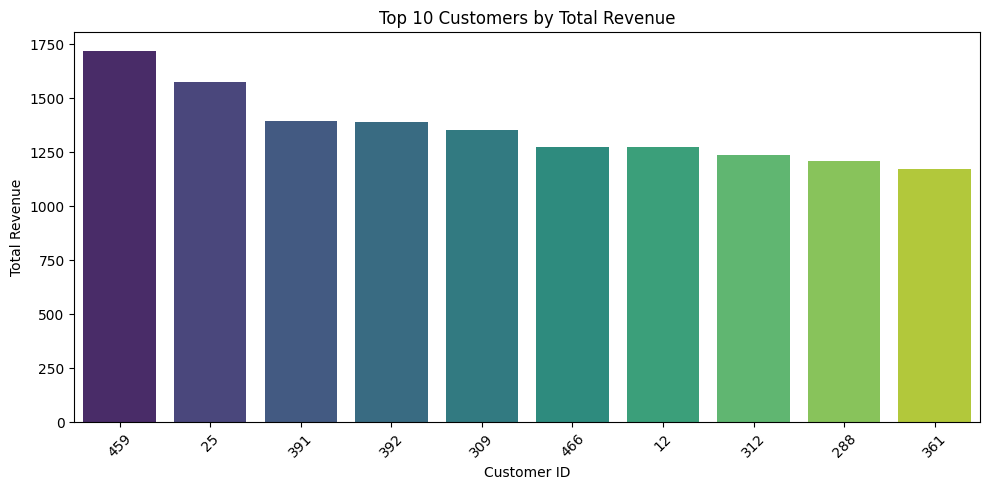

In [61]:
top_customers = sales.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='viridis')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


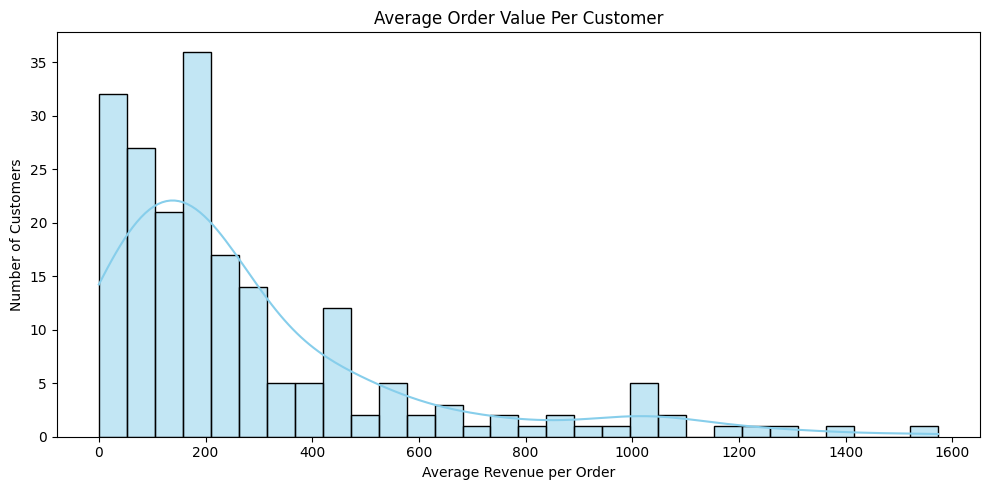

In [62]:
aov = sales.groupby('customer_id')['revenue'].mean()

plt.figure(figsize=(10, 5))
sns.histplot(aov, bins=30, kde=True, color='skyblue')
plt.title('Average Order Value Per Customer')
plt.xlabel('Average Revenue per Order')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

/var/folders/wk/btl5__ws27j89zzfj9xyfnf80000gp/T/ipykernel_2818/630196658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_revenue, x='campaign_period', y='revenue', palette='Set2')


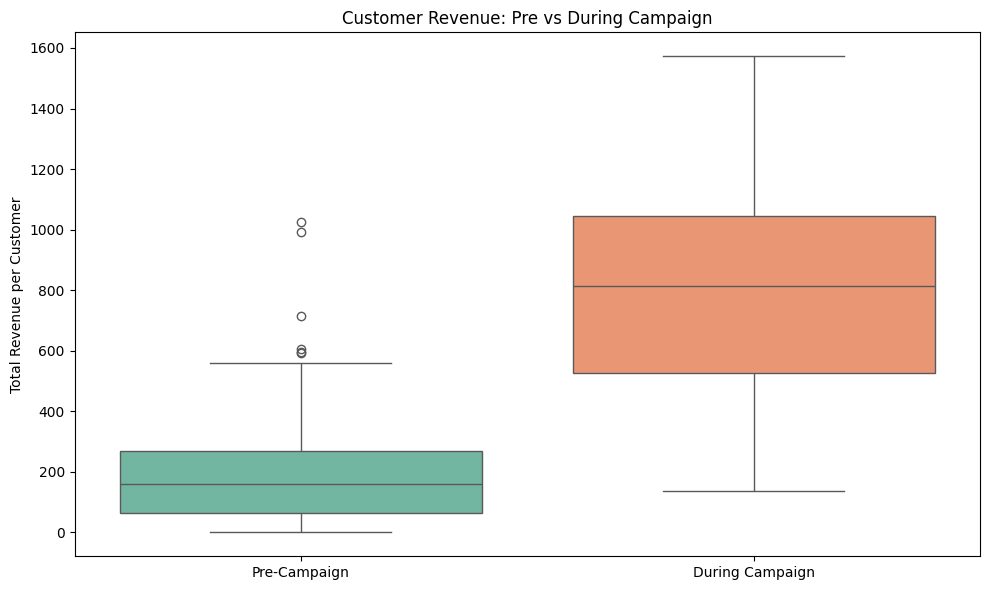

In [63]:
# Tag period labels
sales['campaign_period'] = sales['marketing_campaign'].map({False: 'Pre-Campaign', True: 'During Campaign'})

customer_revenue = sales.groupby(['customer_id', 'campaign_period'])['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_revenue, x='campaign_period', y='revenue', palette='Set2')
plt.title('Customer Revenue: Pre vs During Campaign')
plt.ylabel('Total Revenue per Customer')
plt.xlabel('')
plt.tight_layout()
plt.show()

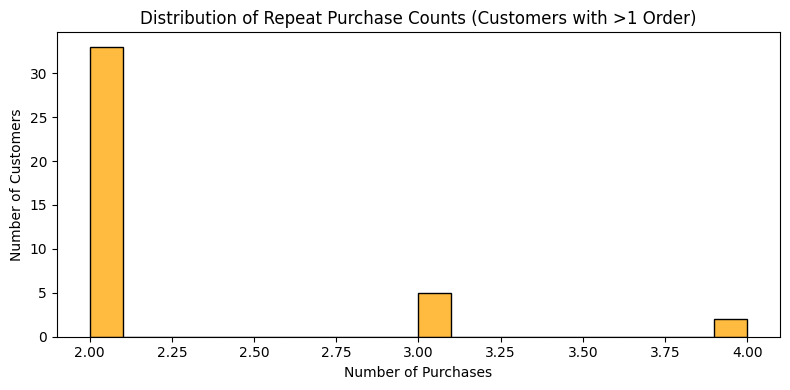

In [64]:
# Count number of purchases per customer
purchase_counts = sales.groupby('customer_id').size()

# Customers who purchased more than once
repeat_customers = purchase_counts[purchase_counts > 1]

plt.figure(figsize=(8, 4))
sns.histplot(repeat_customers, bins=20, color='orange')
plt.title('Distribution of Repeat Purchase Counts (Customers with >1 Order)')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

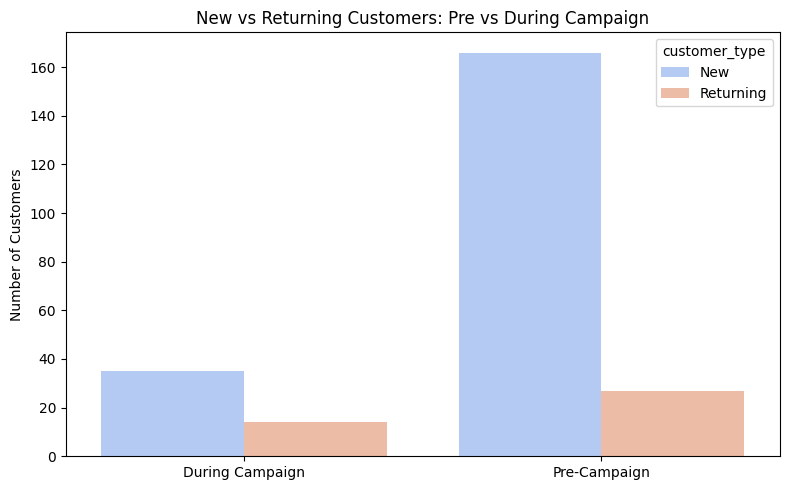

In [65]:
# First purchase date per customer
first_purchase = sales.groupby('customer_id')['date'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']

# Merge with original data
sales_with_first = pd.merge(sales, first_purchase, on='customer_id')

# Tag new vs returning
sales_with_first['customer_type'] = sales_with_first.apply(
    lambda x: 'New' if x['date'] == x['first_purchase_date'] else 'Returning', axis=1)

# Group by period and type
customer_types = sales_with_first.groupby(['campaign_period', 'customer_type'])['customer_id'].nunique().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=customer_types, x='campaign_period', y='customer_id', hue='customer_type', palette='coolwarm')
plt.title('New vs Returning Customers: Pre vs During Campaign')
plt.ylabel('Number of Customers')
plt.xlabel('')
plt.tight_layout()
plt.show()

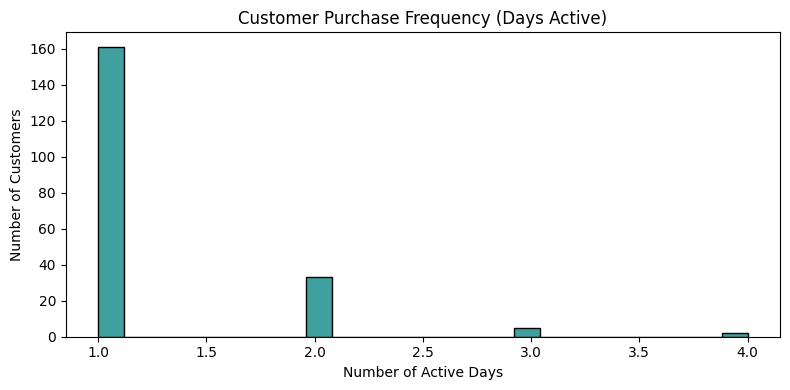

In [66]:
purchase_frequency = sales.groupby('customer_id')['date'].nunique()

plt.figure(figsize=(8, 4))
sns.histplot(purchase_frequency, bins=25, color='teal')
plt.title('Customer Purchase Frequency (Days Active)')
plt.xlabel('Number of Active Days')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [67]:
from causalimpact import CausalImpact

In [71]:
# Aggregate daily revenue
daily_ts = sales.groupby('date')['revenue'].sum().reset_index()

# Set date as index for time series structure
daily_ts.set_index('date', inplace=True)

# Optional: smooth small fluctuations (not required, but can help)
# daily_ts['revenue'] = daily_ts['revenue'].rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')

# Confirm the structure
daily_ts.head()

,revenue
date,
2021-01-01,168.04
2021-01-02,74.71
2021-01-03,110.22
2021-01-04,182.94
2021-01-05,105.68


In [72]:
# Recreate daily revenue series cleanly
daily_ts = sales.groupby('date')['revenue'].sum()
daily_ts = daily_ts.asfreq('D')  # Ensure it's a daily frequency time series
daily_ts = daily_ts.fillna(0)    # Fill any missing days with 0 revenue
daily_ts = pd.DataFrame(daily_ts)  # Convert to DataFrame format

In [74]:
print("Pre-period:", pre_period, type(pre_period[0]), type(pre_period[1]))
print("Post-period:", post_period, type(post_period[0]), type(post_period[1]))

Pre-period: ['2021-01-01', '2021-07-19'] <class 'str'> <class 'str'>
Post-period: ['2021-07-20', '2021-09-07'] <class 'str'> <class 'str'>


In [78]:
# Debugging the structure of the DataFrame `daily_ts` to ensure it's suitable for CausalImpact
# Step 1: Re-create the daily_ts DataFrame as a clean, daily time series
daily_ts = sales.groupby('date')['revenue'].sum()
daily_ts = daily_ts.asfreq('D')  # Set daily frequency
daily_ts = daily_ts.fillna(0)    # Fill missing days with 0
daily_ts = pd.DataFrame(daily_ts)  # Ensure it's a DataFrame

# Check structure
structure_check = {
    "type": type(daily_ts),
    "index_dtype": daily_ts.index.dtype,
    "columns": daily_ts.columns.tolist(),
    "has_nulls": daily_ts.isnull().any().to_dict(),
    "sample_data": daily_ts.head()
}

structure_check

{'type': pandas.core.frame.DataFrame,
 'index_dtype': dtype('<M8[ns]'),
 'columns': ['revenue'],
 'has_nulls': {'revenue': False},
 'sample_data':             revenue
 date               
 2021-01-01      0.0
 2021-01-02      0.0
 2021-01-03      0.0
 2021-01-04      0.0
 2021-01-05      0.0}

In [81]:
# Use verified daily_ts, pre_period, post_period
impact = CausalImpact(data=daily_ts, pre_period=pre_period, post_period=post_period)

# Output
print(impact.summary())
print(impact.summary(output='report'))
impact.plot()

AttributeError: 'NoneType' object has no attribute 'loc'